In [59]:
import numpy as np
import pandas as pd
import matplotlib as plot

In [60]:
df = pd.read_csv("C:\\Users\\Anton\\Downloads\\best-home2\\train.csv", delimiter=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34546 entries, 0 to 34545
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               34546 non-null  int64  
 1   bathrooms        34546 non-null  float64
 2   bedrooms         34546 non-null  int64  
 3   building_id      34546 non-null  object 
 4   created          34546 non-null  object 
 5   description      33509 non-null  object 
 6   display_address  34458 non-null  object 
 7   features         34546 non-null  object 
 8   latitude         34546 non-null  float64
 9   listing_id       34546 non-null  int64  
 10  longitude        34546 non-null  float64
 11  manager_id       34546 non-null  object 
 12  photos           34546 non-null  object 
 13  price            34546 non-null  int64  
 14  street_address   34542 non-null  object 
 15  TARGET           34546 non-null  object 
dtypes: float64(3), int64(4), object(9)
memory usage: 4.2+ MB


In [61]:
df.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,TARGET
0,57094,1.0,3,0,2016-05-19 18:06:27,A FABULOUS 3BR IN MIDTOWN WEST! PERFECT APAR...,HOW AMAZING IS THIS MIDTOWN WEST STEAL!! NO FE...,"['Laundry In Unit', 'No Fee', 'Elevator']",40.7647,7039994,-73.9918,4bdc3d8c1aaa90d997ce2cb77680679b,['https://photos.renthop.com/2/7039994_07be01b...,4495,W 50 & AVE 10,medium
1,33389,1.0,1,9225efdfb57a50bf3ec17ebab082f94a,2016-06-16 02:01:49,Renovated Kitchen and Bathroom!,55 River Drive South,"['Dogs Allowed', 'Cats Allowed', 'No Fee']",40.7275,7166774,-74.0322,e5808a5e6cc13988fe596704428d38d5,['https://photos.renthop.com/2/7166774_03cf63a...,2570,55 River Drive South,medium
2,60458,1.0,0,320de7d3cc88e50a7fbbcfde1e825d21,2016-05-04 02:42:50,RARE AND BEST DEAL ON THE MARKET!!!! PERFECT S...,W 77 Street,"['Elevator', 'Hardwood Floors']",40.7798,6962716,-73.9751,d69d4e111612dd12ef864031c1148543,['https://photos.renthop.com/2/6962716_ec7f56f...,1795,22 W 77 Street,low
3,53048,1.0,2,ce6d18bf3238e668b2bf23f4110b7b67,2016-05-12 05:57:56,Newly renovated flex 2 apartment offers the ne...,John Street,"['Swimming Pool', 'Doorman', 'Elevator', 'Fitn...",40.7081,7002458,-74.0065,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7002458_93f4010...,3400,100 John Street,low
4,592,1.0,3,fee4d465932160318364d9d48d272879,2016-06-16 06:06:15,LOW FEE apartments do not come around like thi...,West 16th Street,"['Laundry in Building', 'Laundry in Unit', 'Di...",40.7416,7170465,-74.0025,6fba9b3a8327c607b8b043716efee684,['https://photos.renthop.com/2/7170465_9c3f173...,5695,321 West 16th Street,low


In [62]:
def year(s):
    return int(s[:s.find('-')])

In [63]:
days_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31] #год високосный

def days(s):
    date = s.split('-')
    day = int(date[2].split()[0])
    pred_days = 0
    for i in range(int(date[1]) - 1):
        pred_days += days_month[i]
    return day + pred_days

In [64]:
def make_time(s):
    time = s.split(':')
    return int(time[0].split(' ')[1]) #Минуты и секунды наверное не важны

In [65]:
def find_num(s):
    x = str(s).split(' ')
    i = 0
    while(i < len(x) and not x[i].isdigit()):
        i += 1
    if (i == len(x)):
        return 0
    return int(x[i])

In [66]:
good_features = []
count_feature = {}
for elem in df['features']:
    x = str(elem)[1:-1].split(', ')
    for elem2 in x:
        if(len(elem2) > 0):
            count_feature[elem2.lower()] = count_feature.get(elem2.lower(), 0) + 1
for elem in count_feature:
    if (count_feature[elem] > 1000):
        good_features.append(elem)
good_features

["'laundry in unit'",
 "'no fee'",
 "'elevator'",
 "'dogs allowed'",
 "'cats allowed'",
 "'hardwood floors'",
 "'swimming pool'",
 "'doorman'",
 "'fitness center'",
 "'dishwasher'",
 "'laundry in building'",
 "'pre-war'",
 "'roof deck'",
 "'outdoor space'",
 "'new construction'",
 "'loft'",
 "'balcony'",
 "'garden/patio'",
 "'terrace'",
 "'dining room'",
 "'high speed internet'",
 "'exclusive'"]

In [67]:
def one_hot(feature):
    def one_hot_ecoding(s):
        x = str(s)[1:-1].split(', ')
        for elem in x:
            if (elem.lower() == feature):
                return 1
        return 0
    return one_hot_ecoding

In [68]:
def make_df(df):
    df = df.drop('Id', axis=1)
    df = df.drop('building_id', axis=1)
    df = df.drop('manager_id', axis=1)
    df = df.drop('listing_id', axis=1) # айдишники явно не нужны
    a = df['created'].copy() #года у всех одинаковые можно не учитывать
    a = a.apply(days) #количество дней от начала года
    b = df['created'].copy()
    b = b.apply(make_time)
    #Я разделяю время и дату на 2 признака
    df['time'] = b
    df['date'] = a
    df = df.drop('created', axis=1)
    df['photos'] = df['photos'].apply(lambda x: len(x.split())) #ссылки на фото я никак обработать не могу, возбму хотя-бы количество
    df['description'] = df['description'].apply(lambda x: len(str(x).split())) #Так как нет возможности изучить описания, возьмём хотя-бы длинну
    df['display_address'] = df['display_address'].apply(find_num) #Заменим адрес на номер улицы, если такой есть
    df['street_address'] = df['street_address'].fillna("")
    df['street_address'] = df['street_address'].apply(find_num) #Заменим адрес на номер улицы, если такой есть
    for elem in good_features:
        func = one_hot(elem)
        df[elem] = df['features'].apply(func)
    df = df.drop('features', axis=1)
    return df

In [69]:
df = make_df(df)
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,photos,price,street_address,TARGET,...,'roof deck','outdoor space','new construction','loft','balcony','garden/patio','terrace','dining room','high speed internet','exclusive'
0,1.0,3,79,0,40.7647,-73.9918,3,4495,50,medium,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1,4,55,40.7275,-74.0322,13,2570,55,medium,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0,43,77,40.7798,-73.9751,6,1795,22,low,...,0,0,0,0,0,0,0,0,0,0
3,1.0,2,169,0,40.7081,-74.0065,4,3400,100,low,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3,119,0,40.7416,-74.0025,3,5695,321,low,...,0,0,0,0,0,0,0,0,0,0


In [70]:
X = df.drop('TARGET', axis=1)
y = df['TARGET']

In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=179)

In [72]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(max_iter=40000, class_weight={'low': 0.71, 'medium': 2.3, 'high': 7})
log.fit(X_train, y_train)

LogisticRegression(class_weight={'high': 7, 'low': 0.71, 'medium': 2.3},
                   max_iter=40000)

In [57]:
y_pred = log.predict(X_test)
y_pred

array(['low', 'low', 'high', ..., 'high', 'medium', 'low'], dtype=object)

In [86]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.5394796557088004

In [110]:
data = pd.read_csv("C:\\Users\\Anton\\Downloads\\best-home2\\test.csv", delimiter=',')
data.head()

,Id,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,19477,2.0,3,87c4e08083ac83618dd9fdbf849331fe,2016-06-21 03:21:59,Rent listed is net effective after one month f...,E 77 St.,"['Pre-War', 'Laundry in Unit', 'Dishwasher', '...",40.7716,7189305,-73.9544,e6472c7237327dd3903b3d6f6a94515a,['https://photos.renthop.com/2/7189305_f47ed5c...,4675,339 E 77 St.
1,29937,1.0,2,850c3d4412aebb3335273ed95f3e4bd4,2016-06-11 03:47:06,A FABULOUS 2BR IN THE UPPER EAST SIDE! PERFECT...,E 112 Street,[],40.7944,7140670,-73.9401,3e9f0fa34d67e5d61aae56776ecb8cee,['https://photos.renthop.com/2/7140670_6c5824f...,2100,252 E 112 Street
2,109148,1.0,2,84ddf917a091828ab9baedc0c926470e,2016-04-17 02:45:19,This is a great true 2 bedroom in a prime Midt...,Ninth Avenue,"['Dogs Allowed', 'Cats Allowed']",40.7650,6886239,-73.9882,10b1ae0a38d50b7ba0cee612d14af9eb,['https://photos.renthop.com/2/6886239_533bbee...,2800,783 Ninth Avenue
3,65728,2.0,3,315a2f868a195b076e5be73411110da2,2016-05-07 11:44:35,Brand new custom renovation in beautiful three...,East 12th street,"['Laundry In Unit', 'No Fee', 'Washer/Dryer in...",40.7288,6981146,-73.9808,e9920062e07ee893c10e38d0259665b0,['https://photos.renthop.com/2/6981146_f4a7400...,5500,186 Avenue B
4,33623,1.0,3,9b525bacc8d294728c35f27c04e22f46,2016-06-24 07:33:26,"Welcome Home! Located on a Prime UWS Block, Ba...",West 86th&Columbus,"['Private Outdoor Space', 'Elevator', 'Laundry...",40.7864,7210864,-73.9713,6d389fbe372d4d30b17733caa9370f95,['https://photos.renthop.com/2/7210864_e8528f4...,3995,47 West 86th street


In [111]:
Id = data['Id']
data = make_df(data)
data.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,photos,price,street_address,time,...,'roof deck','outdoor space','new construction','loft','balcony','garden/patio','terrace','dining room','high speed internet','exclusive'
0,2.0,3,90,77,40.7716,-73.9544,8,4675,339,3,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2,107,112,40.7944,-73.9401,4,2100,252,3,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2,56,0,40.7650,-73.9882,7,2800,783,2,...,0,0,0,0,0,0,0,0,0,0
3,2.0,3,61,0,40.7288,-73.9808,7,5500,186,11,...,0,0,0,0,0,0,0,0,0,0
4,1.0,3,74,0,40.7864,-73.9713,10,3995,47,7,...,0,0,0,0,0,0,0,0,0,0


In [112]:
y_pred = log.predict(data)
y_pred

array(['medium', 'high', 'low', ..., 'high', 'medium', 'medium'],
      dtype=object)

In [119]:
ans = pd.DataFrame(Id, columns=['Id'])
ans['TARGET'] = y_pred
ans.to_csv("C:\\Users\\Anton\\Downloads\\best-home2\\ans.csv", index=False)
ans

,Id,TARGET
0,19477,medium
1,29937,high
2,109148,low
3,65728,medium
4,33623,medium
...,...,...
14801,8577,low
14802,91314,medium
14803,38696,high
14804,64331,medium


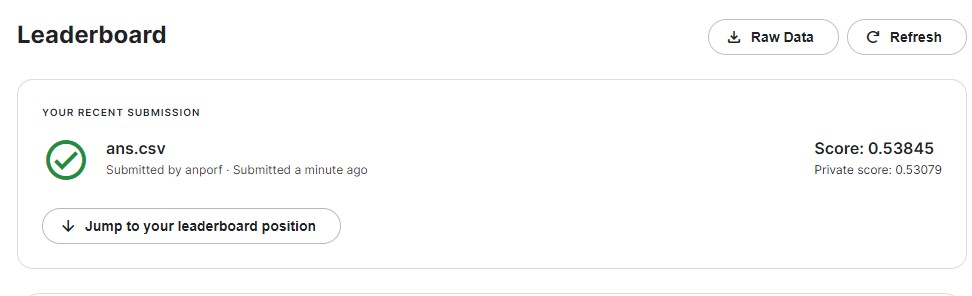

In [121]:
from IPython.display import Image

Image("C:\\Users\\Anton\\Downloads\\screen.jpg")